In [289]:
import tdt
import matplotlib.pyplot as plt
import trompy as tp
import numpy as np
import pickle
%matplotlib inline

In [290]:
def get_snips_baseline(event, fs, signal):
    
    start_in_seconds = event -10
    start_in_sample = int(start_in_seconds * fs)
    length_in_seconds = 20
    length_in_Sample =int(length_in_seconds * fs)
    snip = signal[start_in_sample: start_in_sample + length_in_Sample]
    baseline = np.mean(snip[0 : int((length_in_seconds/2)* fs)])
    std = np.std(snip[0 : int((length_in_seconds/2)* fs)])
    
    snip_baseline_corrected = (snip - baseline) / std

    return snip_baseline_corrected

In [291]:
def get_snips_baseline_8s(event, fs, signal):
    
    start_in_seconds = event -10
    start_in_sample = int(start_in_seconds * fs)
    length_in_seconds = 20
    length_in_Sample =int(length_in_seconds * fs)
    snip = signal[start_in_sample: start_in_sample + length_in_Sample]
    baseline = np.mean(snip[0 : int((length_in_seconds/2.5)* fs)])
    std = np.std(snip[0 : int((length_in_seconds/2)* fs)])
    
    snip_baseline_corrected = (snip - baseline) / std

    return snip_baseline_corrected

In [292]:
folder = "C:\\Data\\NAD\\tanks\\"

In [417]:
#Cued Day 1, mice: NAD22, NAD23, NAD24
#tank = "Test-220513-105923"

#Cued Day 2, mice: NAD22, NAD23, NAD24
#tank = "Test-220516-090735"

#Cued Day 3, mice: NAD22, NAD23, NAD24
#tank = "Test-220518-082500"

#Cued Day 4, mice: NAD22, NAD23, NAD24
#tank = "Test-220519-083918"

#Cued Day 5, mice: NAD22, NAD23, NAD24
#tank = "Test-220520-110308"

#Cued Day 6 (after switch), mice: NAD22, NAD23, NAD24
#tank = "Test-220527-111107"

#Cued Day 7 (after switch), mice: NAD22, NAD23, NAD24
#tank = "Test-220530-135823"

#Cued Day 2: NAD30, NAD31, NAD33, 34
tank = "Test-220608-173302"



In [418]:
data = tdt.read_block(folder+tank)

read from t=0s to t=3770.53s


In [419]:
#5 
#licks5 = data.epocs._5RL_.onset
#sipper5 = data.epocs._5sp_.onset
#blue5 = data.streams._4655.data
#UV5 = data.streams._4055.data

fs = data.streams._4055.fs

#6 
licks6 = data.epocs._6RL_.onset
sipper6 = data.epocs._6sp_.onset
blue6 = data.streams._4656.data
UV6 = data.streams._4056.data

#7
licks7 = data.epocs._7RL_.onset
sipper7 = data.epocs._7sp_.onset
blue7 = data.streams._4657.data
UV7 = data.streams._4057.data

#8 
#licks8 = data.epocs._8RL_.onset
#sipper8 = data.epocs._8sp_.onset
#blue8 = data.streams._4658.data
#UV8 = data.streams._4058.data


In [420]:
correctedSignal5 = tp.processdata(blue5, UV5)
correctedSignal6 = tp.processdata(blue6, UV6)
correctedSignal7 = tp.processdata(blue7, UV7)
correctedSignal8 = tp.processdata(blue8, UV8)

mean5 = np.mean(correctedSignal5)
std5 = np.std(correctedSignal5)

mean6 = np.mean(correctedSignal6)
std6 = np.std(correctedSignal6)

mean7 = np.mean(correctedSignal7)
std7 = np.std(correctedSignal7)

mean8 = np.mean(correctedSignal8)
std8 = np.std(correctedSignal8)

z5 = (correctedSignal5 - mean5) / std5
z6 = (correctedSignal6 - mean6) / std6
z7 = (correctedSignal7 - mean7) / std7
z8 = (correctedSignal7 - mean8) / std8

In [421]:
lickdata5 = tp.lickCalc(licks5)
runs5 = lickdata5["rStart"]

lickdata6 = tp.lickCalc(licks6)
runs6 = lickdata6["rStart"]

lickdata7 = tp.lickCalc(licks7)
runs7 = lickdata7["rStart"]

lickdata8 = tp.lickCalc(licks8)
runs8 = lickdata8["rStart"]

#print(len(runs7))

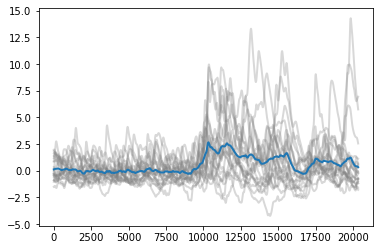

In [422]:
#aligned to first lick in run, NAD22
snips5 = []

for run in runs5:
    snip =get_snips_baseline(run, fs, correctedSignal5)
    snips5.append(snip)
    plt.plot(snip, color="grey", alpha = 0.3)
    
snips = np.array(snips5)
#snips =snips[0:-1]   #use only if the last trial is a different lenght from the others  
mean5= np.mean(snips5, axis=0)
plt.plot(mean5)

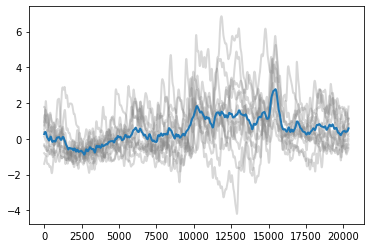

In [423]:
#aligned to first lick in run, NAD23
snips6 = []

for run in runs6:
    snip =get_snips_baseline(run, fs, correctedSignal6)
    snips6.append(snip)
    plt.plot(snip, color="grey", alpha = 0.3)
    
snips = np.array(snips6)
#snips =snips[0:-1]   #use only if the last trial is a different lenght from the others  
mean6= np.mean(snips6, axis=0)
plt.plot(mean6)

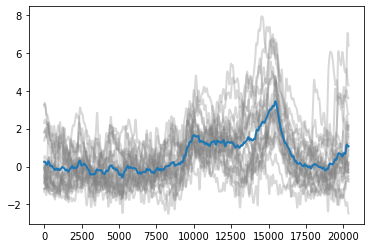

In [424]:
#aligned to first lick in run, NAD24
snips7 = []

for run in runs7:
    snip =get_snips_baseline(run, fs, correctedSignal7)
    snips7.append(snip)
    plt.plot(snip, color="grey", alpha = 0.3)
    
snips = np.array(snips7)
#snips =snips[0:-1]   #use only if the last trial is a different lenght from the others  
mean7= np.mean(snips7, axis=0)
plt.plot(mean7)

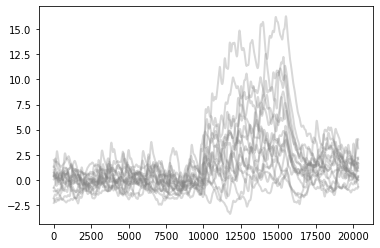

In [425]:
#aligned to first lick in run, box 8
snips8 = []

for run in runs8:
    snip =get_snips_baseline(run, fs, correctedSignal8)
    snips8.append(snip)
    plt.plot(snip, color="grey", alpha = 0.3)
    
snips = np.array(snips8)
#snips =snips[0:-1]   #use only if the last trial is a different lenght from the others  
mean7= np.mean(snips8, axis=0)
plt.plot(mean8)

In [426]:
sipper5list = sipper5.tolist()
sipper6list = sipper6.tolist()
sipper7list = sipper7.tolist()
sipper8list = sipper8.tolist()

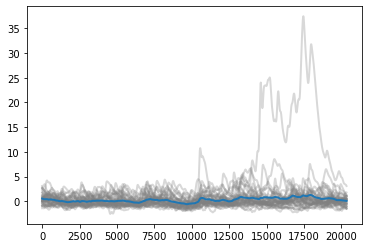

In [428]:
#aligned to sipper extention, box 5
snips5_sip = []

for extention in sipper5list:
    snip =get_snips_baseline(extention, fs, correctedSignal5)
    snips5_sip.append(snip)
    plt.plot(snip, color="grey", alpha = 0.3)
    
snips = np.array(snips5_sip)
#snips =snips[0:-1]   #use only if the last trial is a different lenght from the others  
mean5sip= np.mean(snips5_sip, axis=0)
plt.plot(mean5sip)

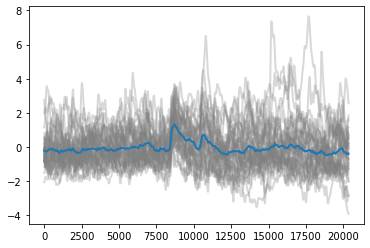

In [429]:
#aligned to sipper extention, box6
snips6_sip = []

for extention in sipper6list:
    snip =get_snips_baseline(extention, fs, correctedSignal6)
    snips6_sip.append(snip)
    plt.plot(snip, color="grey", alpha = 0.3)
    
snips = np.array(snips6_sip)
#snips =snips[0:-1]   #use only if the last trial is a different lenght from the others  
mean6sip= np.mean(snips6_sip, axis=0)
plt.plot(mean6sip)

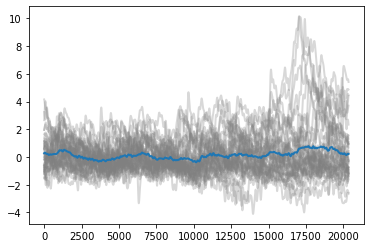

In [430]:
#aligned to sipper extention, box7
snips7_sip = []

for extention in sipper7list:
    snip =get_snips_baseline(extention, fs, correctedSignal7)
    snips7_sip.append(snip)
    plt.plot(snip, color="grey", alpha = 0.3)
    
snips = np.array(snips7_sip)
#snips =snips[0:-1]   #use only if the last trial is a different lenght from the others  
mean7sip= np.mean(snips7_sip, axis=0)
plt.plot(mean7sip)

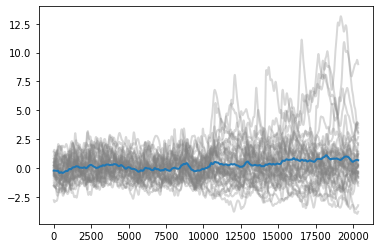

In [431]:
#aligned to sipper extention, box 8
snips8_sip = []

for extention in sipper8list:
    snip =get_snips_baseline(extention, fs, correctedSignal8)
    snips8_sip.append(snip)
    plt.plot(snip, color="grey", alpha = 0.3)
    
snips = np.array(snips8_sip)
#snips =snips[0:-1]   #use only if the last trial is a different lenght from the others  
mean8sip= np.mean(snips8_sip, axis=0)
plt.plot(mean8sip)

In [432]:
snips_dict_cues = {}

In [306]:
rows, header = tp.metafilereader("C:\\Users\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Photometry - GRAB-DA in NAc\\NAD_2_and_3.xls")

File is excel file. Making csv metafile first


In [307]:
#this is for all cued trials, row 10 excludes rats that didnt lick at all because 0 licks give errors

for row in rows:
    if row[7] == "cues" and row[10] != 0:
        tank = row[0]
        data = tdt.read_block(folder+tank)

        sipper_ttl = row[13]
        sipper = getattr(data.epocs, sipper_ttl)   
        sipper_onset =sipper.onset
        
        licks_ttl = row[14]
        licks = getattr(data.epocs, licks_ttl)
        licks_onset =licks.onset
        lickdata = tp.lickCalc(licks_onset)

        blue_sig =   row[12]  
        UV_sig =   row[11] 

        blue = getattr(data.streams, blue_sig).data
        UV = getattr(data.streams,UV_sig).data

        fs = getattr(data.streams,UV_sig).fs


        correctedSignal = tp.processdata(blue, UV)

#for all trials 
        trials = sipper_onset

        snips = []

        for trial in trials:
            snip =get_snips_baseline_8s(trial, fs, correctedSignal)
            snips.append(snip)

        snips = np.array(snips)
        if len(snips[-1]) == len(snips[0]):
            mean_snips= np.mean(snips, axis=0) 
        else:
            snips =snips[0:-1]
            mean_snips= np.mean(snips, axis=0)
            
#for trials with licking, aligned to first lick?
        lickdata = tp.lickCalc(licks_onset)
        runs = lickdata["rStart"]
        lick_snips = []

        for run in runs:
            snip =get_snips_baseline(run, fs, correctedSignal)
            lick_snips.append(snip)

        lick_snips = np.array(lick_snips)
        if len(lick_snips[-1]) == len(lick_snips[0]):
            mean_lick_snips= np.mean(lick_snips, axis=0) 
        else:
            lick_snips =lick_snips[0:-1]
            mean_lick_snips= np.mean(lick_snips, axis=0)
            
#for trials with licking, aligned to sipper? 
        trials = sipper_onset
        runs = lickdata["rStart"]
        
        lick_snips_sipper_out = []
        no_lick_snips_sipper_out = []
        
        
        for trial in trials:
            start_in_seconds = trial
            start_in_sample = int(start_in_seconds * fs)
            length_in_seconds = 30
            length_in_Sample =int(length_in_seconds * fs)
            
            #time_for_licks_in_trial = correctedSignal[start_in_sample: start_in_sample + length_in_Sample]
            
            runs_in_trial = [run_ts for run_ts in runs if (run_ts > start_in_seconds) and (run_ts < start_in_seconds + length_in_seconds)]
            
            if len(runs_in_trial) > 0:
                snip = get_snips_baseline(trial, fs, correctedSignal)
                lick_snips_sipper_out.append(snip)
            else:
                snip = get_snips_baseline(trial, fs, correctedSignal)
                no_lick_snips_sipper_out.append(snip)

        lick_snips_sipper_out = np.array(lick_snips_sipper_out)
        if len(lick_snips_sipper_out) > 0:
            if len(lick_snips_sipper_out[-1]) == len(lick_snips_sipper_out[0]):
                mean_lick_snips_sipper_out= np.mean(lick_snips_sipper_out, axis=0) 
            else:
                lick_snips_sipper_out =lick_snips_sipper_out[0:-1]
                mean_lick_snips_sipper_out= np.mean(lick_snips_sipper_out, axis=0)
        else:
            mean_lick_snips_sipper_out = []

            
        no_lick_snips_sipper_out = np.array(no_lick_snips_sipper_out)
        if len(no_lick_snips_sipper_out) > 0:
            if len(no_lick_snips_sipper_out[-1]) == len(no_lick_snips_sipper_out[0]):
                mean_no_lick_snips_sipper_out= np.mean(no_lick_snips_sipper_out, axis=0) 
            else:
                no_lick_snips_sipper_out =no_lick_snips_sipper_out[0:-1]
                mean_no_lick_snips_sipper_out= np.mean(no_lick_snips_sipper_out, axis=0)
        else:
            no_mean_lick_snips_sipper_out = []

        key = row[2]+"_s"+str(int(row[6]))

        snips_dict_cues[key]={}

        snips_dict_cues[key]["mouse"] = row[2]  
        snips_dict_cues[key]["sex"] = row[3]
        snips_dict_cues[key]["diet"] = row[4]
        snips_dict_cues[key]["session"] = row[6]
        snips_dict_cues[key]["snips"] = snips 
        snips_dict_cues[key]["snips_mean"] = mean_snips
        snips_dict_cues[key]["lick_snips"] = lick_snips 
        snips_dict_cues[key]["lick_snips_mean"] = mean_lick_snips
        snips_dict_cues[key]["lick_snips_sipper_out"] = lick_snips_sipper_out
        snips_dict_cues[key]["lick_snips_sipper_out_mean"] = mean_lick_snips_sipper_out
        snips_dict_cues[key]["no_lick_snips_sipper_out"] = no_lick_snips_sipper_out
        snips_dict_cues[key]["no_lick_snips_sipper_out_mean"] = mean_no_lick_snips_sipper_out
        snips_dict_cues[key]["lick data"] = lickdata
        snips_dict_cues[key]["sipper"] = sipper_onset
        

read from t=0s to t=3663.74s


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\lick_utils.py:219: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))


read from t=0s to t=3663.74s
read from t=0s to t=3663.74s
read from t=0s to t=3878.91s
read from t=0s to t=3878.91s
read from t=0s to t=3878.91s
read from t=0s to t=3746.96s
read from t=0s to t=3746.96s
read from t=0s to t=3746.96s
read from t=0s to t=3834.45s
read from t=0s to t=3834.45s
read from t=0s to t=3834.45s
read from t=0s to t=3843.93s
read from t=0s to t=3843.93s
read from t=0s to t=3787.72s
read from t=0s to t=3787.72s
read from t=0s to t=3787.72s
read from t=0s to t=3764.4s
read from t=0s to t=3764.4s
read from t=0s to t=3764.4s
read from t=0s to t=3690.75s
read from t=0s to t=3690.75s
read from t=0s to t=3690.75s
read from t=0s to t=3803.24s
read from t=0s to t=3803.24s
read from t=0s to t=3803.24s
read from t=0s to t=3688.07s
read from t=0s to t=3688.07s
read from t=0s to t=3688.07s
read from t=0s to t=3838.31s
read from t=0s to t=3838.31s
read from t=0s to t=3838.31s
read from t=0s to t=3838.31s
read from t=0s to t=3943.75s
read from t=0s to t=3943.75s
read from t=0s to

C:\Users\kvo019\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\kvo019\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Could not calculate burst probability
Could not calculate burst probability
read from t=0s to t=4026.38s
read from t=0s to t=4026.38s
read from t=0s to t=4026.38s
read from t=0s to t=3770.53s
read from t=0s to t=3770.53s
read from t=0s to t=3770.53s
read from t=0s to t=3897.11s
read from t=0s to t=3897.11s
read from t=0s to t=3897.11s
Optimal fit parameters not found
Optimal fit parameters not found
read from t=0s to t=3816.41s
read from t=0s to t=3816.41s
read from t=0s to t=3816.41s
read from t=0s to t=3895.01s
Could not calculate burst probability
Could not calculate burst probability
read from t=0s to t=3855.17s
read from t=0s to t=3855.17s
read from t=0s to t=3855.17s
read from t=0s to t=3823.96s
read from t=0s to t=3823.96s
read from t=0s to t=3823.96s
read from t=0s to t=3752.91s
Could not calculate burst probability
Could not calculate burst probability
read from t=0s to t=3752.91s
read from t=0s to t=3752.91s
read from t=0s to t=3752.91s


In [356]:
len(lick_snips)

13

In [355]:
len(mean_lick_snips)

20345

In [354]:
mean_snips

array([-0.18346845, -0.18416863, -0.1849102 , ..., -0.02058946,
       -0.02209415, -0.02361059])

In [308]:
#all trials

Day1_Snips_NR = []
Day1_Snips_PR = []

Day2_Snips_NR = []
Day2_Snips_PR = []

Day3_Snips_NR = []
Day3_Snips_PR = []

Day4_Snips_NR = []
Day4_Snips_PR = []

Day5_Snips_NR = []
Day5_Snips_PR = []

Day6_Snips_NRtoPR = []
Day6_Snips_PRtoNR = []

Day7_Snips_NRtoPR = []
Day7_Snips_PRtoNR = []

Day8_Snips_NRtoPR = []
Day8_Snips_PRtoNR = []

Day9_Snips_NRtoPR = []
Day9_Snips_PRtoNR = []

Day10_Snips_NRtoPR = []
Day10_Snips_PRtoNR = []


for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 1:
        Day1_Snips_NR.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 1:
        Day1_Snips_PR.append(snips_dict_cues[key]["snips_mean"])

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 2:
        Day2_Snips_NR.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 2:
        Day2_Snips_PR.append(snips_dict_cues[key]["snips_mean"])        

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 3:
        Day3_Snips_NR.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 3:
        Day3_Snips_PR.append(snips_dict_cues[key]["snips_mean"])      
    
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 4:
        Day4_Snips_NR.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 4:
        Day4_Snips_PR.append(snips_dict_cues[key]["snips_mean"])   
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 5:
        Day5_Snips_NR.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 5:
        Day5_Snips_PR.append(snips_dict_cues[key]["snips_mean"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 6:
        Day6_Snips_NRtoPR.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 6:
        Day6_Snips_PRtoNR.append(snips_dict_cues[key]["snips_mean"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 7:
        Day7_Snips_NRtoPR.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 7:
        Day7_Snips_PRtoNR.append(snips_dict_cues[key]["snips_mean"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 8:
        Day8_Snips_NRtoPR.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 8:
        Day8_Snips_PRtoNR.append(snips_dict_cues[key]["snips_mean"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 9:
        Day9_Snips_NRtoPR.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 9:
        Day9_Snips_PRtoNR.append(snips_dict_cues[key]["snips_mean"])

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 10:
        Day10_Snips_NRtoPR.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 10:
        Day10_Snips_PRtoNR.append(snips_dict_cues[key]["snips_mean"])

In [381]:
print("length for snips, NR")
print(len(Day1_Snips_NR))
print(len(Day2_Snips_NR))
print(len(Day3_Snips_NR))
print(len(Day4_Snips_NR))
print(len(Day5_Snips_NR))

print("length for snips, PR")

print(len(Day1_Snips_PR))
print(len(Day2_Snips_PR))
print(len(Day3_Snips_PR))
print(len(Day4_Snips_PR))
print(len(Day5_Snips_PR))

length for snips, NR
5
5
5
3
6
length for snips, PR
5
5
4
4
3


Cued trials, 10 seconds before and after sipper extension, all trials


<AxesSubplot:>

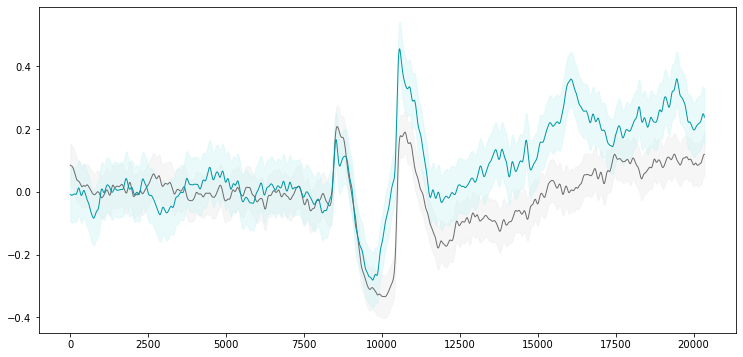

In [388]:
#all trials, averaged across days --- but is this doing it right? averaging for each mouse, and then across groups? or acting like ther are far more mice?

Snips_NR = []
Snips_PR = []


for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR":
        Snips_NR.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR":
        Snips_PR.append(snips_dict_cues[key]["snips_mean"])
        
print("Cued trials, 10 seconds before and after sipper extension, all trials")
f,ax=plt.subplots(figsize=(12.5,6), ncols=1, sharey=True)
f.subplots_adjust(wspace=0.3)

tp.shadedError(ax, Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax, Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

In [389]:
len(Snips_PR)

21

NAD22_s1
N
A
D
2
2
NAD23_s1
N
A
D
2
3
NAD24_s1
N
A
D
2
4
NAD22_s2
N
A
D
2
2
NAD23_s2
N
A
D
2
3
NAD24_s2
N
A
D
2
4
NAD22_s3
N
A
D
2
2
NAD23_s3
N
A
D
2
3
NAD24_s3
N
A
D
2
4
NAD22_s4
N
A
D
2
2
NAD23_s4
N
A
D
2
3
NAD24_s4
N
A
D
2
4
NAD22_s5
N
A
D
2
2
NAD23_s5
N
A
D
2
3
NAD22_s6
N
A
D
2
2
NAD23_s6
N
A
D
2
3
NAD24_s6
N
A
D
2
4
NAD22_s7
N
A
D
2
2
NAD23_s7
N
A
D
2
3
NAD24_s7
N
A
D
2
4
NAD22_s8
N
A
D
2
2
NAD23_s8
N
A
D
2
3
NAD24_s8
N
A
D
2
4
NAD22_s9
N
A
D
2
2
NAD23_s9
N
A
D
2
3
NAD24_s9
N
A
D
2
4
NAD22_s10
N
A
D
2
2
NAD23_s10
N
A
D
2
3
NAD24_s10
N
A
D
2
4
NAD25_s1
N
A
D
2
5
NAD26_s1
N
A
D
2
6
NAD28_s1
N
A
D
2
8
NAD29_s1
N
A
D
2
9
NAD31_s1
N
A
D
3
1
NAD33_s1
N
A
D
3
3
NAD34_s1
N
A
D
3
4
NAD25_s2
N
A
D
2
5
NAD26_s2
N
A
D
2
6
NAD28_s2
N
A
D
2
8
NAD29_s2
N
A
D
2
9
NAD31_s2
N
A
D
3
1
NAD33_s2
N
A
D
3
3
NAD34_s2
N
A
D
3
4
NAD26_s3
N
A
D
2
6
NAD28_s3
N
A
D
2
8
NAD29_s3
N
A
D
2
9
NAD31_s3
N
A
D
3
1
NAD33_s3
N
A
D
3
3
NAD34_s3
N
A
D
3
4
NAD26_s4
N
A
D
2
6
NAD31_s4
N
A
D
3
1
NAD33_s4
N
A
D
3
3
NAD34_s4


<AxesSubplot:>

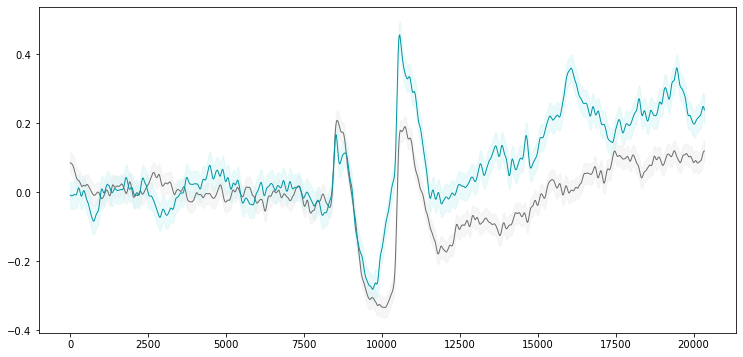

In [416]:
#version trying to average across mice -- errors are smaller,but is this right or not?

Snips_NR = []
Snips_PR = []


for key in snips_dict_cues.keys():
    print(key)
    for mouse in snips_dict_cues[key]["mouse"]:
        print(mouse)
        if snips_dict_cues[key]["diet"] == "NR":
            Snips_NR.append(snips_dict_cues[key]["snips_mean"])
        elif snips_dict_cues[key]["diet"] == "PR":
            Snips_PR.append(snips_dict_cues[key]["snips_mean"])
        
print("Cued trials, 10 seconds before and after sipper extension, all trials")
f,ax=plt.subplots(figsize=(12.5,6), ncols=1, sharey=True)
f.subplots_adjust(wspace=0.3)

tp.shadedError(ax, Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax, Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

In [408]:
len(snips_dict_cues.keys())
snips_dict_cues.keys()

dict_keys(['NAD22_s1', 'NAD23_s1', 'NAD24_s1', 'NAD22_s2', 'NAD23_s2', 'NAD24_s2', 'NAD22_s3', 'NAD23_s3', 'NAD24_s3', 'NAD22_s4', 'NAD23_s4', 'NAD24_s4', 'NAD22_s5', 'NAD23_s5', 'NAD22_s6', 'NAD23_s6', 'NAD24_s6', 'NAD22_s7', 'NAD23_s7', 'NAD24_s7', 'NAD22_s8', 'NAD23_s8', 'NAD24_s8', 'NAD22_s9', 'NAD23_s9', 'NAD24_s9', 'NAD22_s10', 'NAD23_s10', 'NAD24_s10', 'NAD25_s1', 'NAD26_s1', 'NAD28_s1', 'NAD29_s1', 'NAD31_s1', 'NAD33_s1', 'NAD34_s1', 'NAD25_s2', 'NAD26_s2', 'NAD28_s2', 'NAD29_s2', 'NAD31_s2', 'NAD33_s2', 'NAD34_s2', 'NAD26_s3', 'NAD28_s3', 'NAD29_s3', 'NAD31_s3', 'NAD33_s3', 'NAD34_s3', 'NAD26_s4', 'NAD31_s4', 'NAD33_s4', 'NAD34_s4', 'NAD26_s5', 'NAD28_s5', 'NAD29_s5', 'NAD30_s5', 'NAD31_s5', 'NAD33_s5', 'NAD34_s5'])

In [411]:
snips_dict_cues['NAD22_s1'].keys()

dict_keys(['mouse', 'sex', 'diet', 'session', 'snips', 'snips_mean', 'lick_snips', 'lick_snips_mean', 'lick_snips_sipper_out', 'lick_snips_sipper_out_mean', 'no_lick_snips_sipper_out', 'no_lick_snips_sipper_out_mean', 'lick data', 'sipper'])

In [414]:
d = snips_dict_cues['NAD22_s1']
len(d["lick_snips_mean"])

20345

In [387]:
Snips_NR

[array([ 0.13032541,  0.13000477,  0.12969353, ..., -0.12489527,
        -0.12611551, -0.12734865]),
 array([0.06721156, 0.06721077, 0.06721459, ..., 0.38312121, 0.38312283,
        0.38310674]),
 array([0.01872927, 0.01960336, 0.02047395, ..., 0.22222506, 0.22146884,
        0.2207006 ]),
 array([0.15710461, 0.15741065, 0.15769754, ..., 0.29529489, 0.29540022,
        0.29551204]),
 array([0.174361  , 0.17435854, 0.17434948, ..., 0.08130669, 0.08137888,
        0.08143995]),
 array([0.03166653, 0.03134169, 0.03102434, ..., 0.12313669, 0.12232221,
        0.121457  ]),
 array([ 0.44123427,  0.44158917,  0.44192566, ..., -0.18515929,
        -0.18529353, -0.18538172]),
 array([0.13680971, 0.13834753, 0.13985696, ..., 0.50243141, 0.50151022,
        0.5006107 ]),
 array([0.35019699, 0.34990927, 0.34962285, ..., 0.69131837, 0.69208696,
        0.6928269 ]),
 array([-0.29101299, -0.2910416 , -0.29106393, ..., -0.21960084,
        -0.21895153, -0.21831391]),
 array([-0.00501727, -0.00529652

In [360]:
len(Snips_PR)

105

aligned to first lick


<AxesSubplot:>

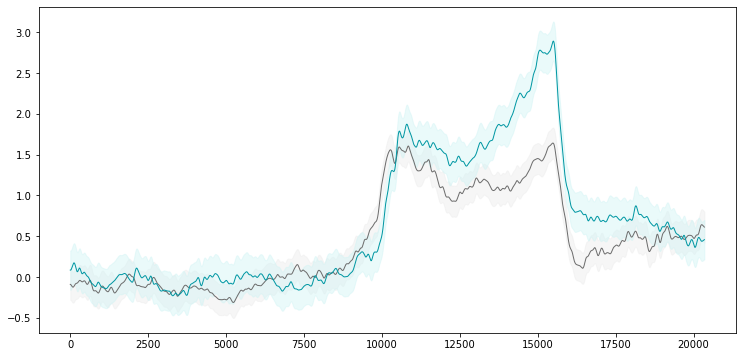

In [361]:
#trials with licking

Lick_Snips_NR = []
Lick_Snips_PR = []


for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR":
        Lick_Snips_NR.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR":
        Lick_Snips_PR.append(snips_dict_cues[key]["lick_snips_mean"])
        
print("aligned to first lick")
f,ax=plt.subplots(figsize=(12.5,6), ncols=1, sharey=True)
f.subplots_adjust(wspace=0.3)

tp.shadedError(ax, Lick_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax, Lick_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

Cued trials, 10 seconds before and after sipper extension, all trials


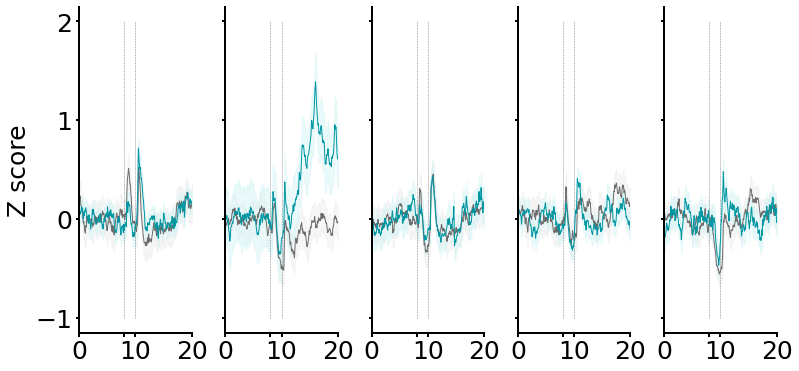

In [382]:
print("Cued trials, 10 seconds before and after sipper extension, all trials")
f,ax=plt.subplots(figsize=(12.5,6), ncols=5, sharey=True)
f.subplots_adjust(wspace=0.3)

tp.shadedError(ax[0], Day1_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[0], Day1_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[1], Day2_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[1], Day2_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[2], Day3_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[2], Day3_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[3], Day4_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[3], Day4_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[4], Day5_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[4], Day5_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

ax[0].set_ylabel("Z score", fontsize = 25)
#ax[0].set_xlabel("Time")
ax[0].tick_params(labelsize=25, width=2)
ax[1].tick_params(labelsize=25, width=2)
ax[2].tick_params(labelsize=25, width=2)
ax[3].tick_params(labelsize=25, width=2)
ax[4].tick_params(labelsize=25, width=2)

ax[0].set_xlim([0, 20000])
ax[0].set_xticks([0, 8000, 10000, 20000])
ax[0].set_xticklabels(["0", "", "10", "20"])

ax[1].set_xlim([0, 20000])
ax[1].set_xticks([0, 8000, 10000, 20000])
ax[1].set_xticklabels(["0","", "10", "20"])

ax[2].set_xlim([0, 20000])
ax[2].set_xticks([0, 8000, 10000, 20000])
ax[2].set_xticklabels(["0","", "10", "20"])

ax[3].set_xlim([0, 20000])
ax[3].set_xticks([0, 8000, 10000, 20000])
ax[3].set_xticklabels(["0","", "10", "20"])

ax[4].set_xlim([0, 20000])
ax[4].set_xticks([0, 8000, 10000, 20000])
ax[4].set_xticklabels(["0","", "10", "20"])

#ax[0].set_title("session 1")
#ax[1].set_title("session 2")
#ax[2].set_title("session 3")
#ax[3].set_title("session 4")
#ax[4].set_title("session 5")

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['top'].set_visible(False)

ax[0].spines["bottom"].set_linewidth(2)
ax[1].spines["bottom"].set_linewidth(2)
ax[2].spines["bottom"].set_linewidth(2)
ax[3].spines["bottom"].set_linewidth(2)
ax[4].spines["bottom"].set_linewidth(2)

ax[0].spines["left"].set_linewidth(2)
ax[1].spines["left"].set_linewidth(2)
ax[2].spines["left"].set_linewidth(2)
ax[3].spines["left"].set_linewidth(2)
ax[4].spines["left"].set_linewidth(2)


ax[0].vlines(x=[8000, 10000], ymin=-1, ymax=2, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[1].vlines(x=[8000, 10000], ymin=-1, ymax=2, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[2].vlines(x=[8000, 10000], ymin=-1, ymax=2, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[3].vlines(x=[8000, 10000], ymin=-1, ymax=2, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[4].vlines(x=[8000, 10000], ymin=-1, ymax=2, colors='black', ls='--', lw=0.5, alpha=0.5)
f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Conferences\\2022 MMiN\\poster\\figures\\photometry_all_trials_sipper_aligned.pdf")


Cued trials, 10 seconds before and after sipper extension, all trials, after diet switch


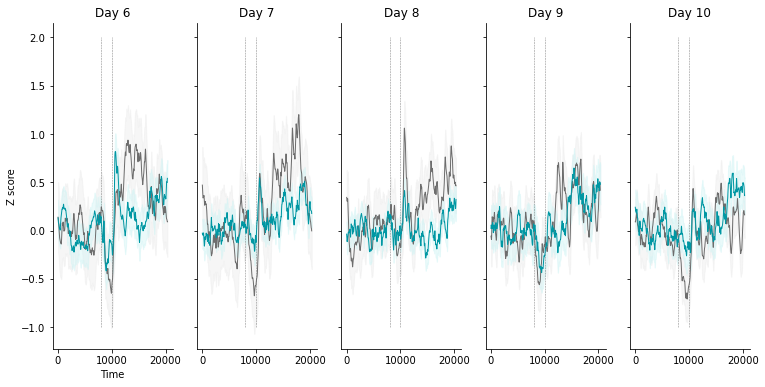

In [383]:
print("Cued trials, 10 seconds before and after sipper extension, all trials, after diet switch")
f,ax=plt.subplots(figsize=(12.5,6), ncols=5, sharey=True)

tp.shadedError(ax[0], Day6_Snips_NRtoPR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[0], Day6_Snips_PRtoNR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[1], Day7_Snips_NRtoPR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[1], Day7_Snips_PRtoNR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[2], Day8_Snips_NRtoPR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[2], Day8_Snips_PRtoNR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[3], Day9_Snips_NRtoPR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[3], Day9_Snips_PRtoNR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[4], Day10_Snips_NRtoPR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[4], Day10_Snips_PRtoNR, linecolor="#0097A3", errorcolor="#CCF3F4")

ax[0].set_ylabel("Z score")
ax[0].set_xlabel("Time")

ax[0].set_title("Day 6")
ax[1].set_title("Day 7")
ax[2].set_title("Day 8")
ax[3].set_title("Day 9")
ax[4].set_title("Day 10")

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['top'].set_visible(False)

ax[0].vlines(x=[8000, 10000], ymin=-1, ymax=2, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[1].vlines(x=[8000, 10000], ymin=-1, ymax=2, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[2].vlines(x=[8000, 10000], ymin=-1, ymax=2, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[3].vlines(x=[8000, 10000], ymin=-1, ymax=2, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[4].vlines(x=[8000, 10000], ymin=-1, ymax=2, colors='black', ls='--', lw=0.5, alpha=0.5)


In [316]:
#trials with licking

Day1_Lick_Snips_NR = []
Day1_Lick_Snips_PR = []

Day2_Lick_Snips_NR = []
Day2_Lick_Snips_PR = []

Day3_Lick_Snips_NR = []
Day3_Lick_Snips_PR = []

Day4_Lick_Snips_NR = []
Day4_Lick_Snips_PR = []

Day5_Lick_Snips_NR = []
Day5_Lick_Snips_PR = []

Day6_Lick_Snips_NRtoPR = []
Day6_Lick_Snips_PRtoNR = []

Day7_Lick_Snips_NRtoPR = []
Day7_Lick_Snips_PRtoNR = []

Day8_Lick_Snips_NRtoPR = []
Day8_Lick_Snips_PRtoNR = []

Day9_Lick_Snips_NRtoPR = []
Day9_Lick_Snips_PRtoNR = []

Day10_Lick_Snips_NRtoPR = []
Day10_Lick_Snips_PRtoNR = []

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 1:
        Day1_Lick_Snips_NR.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 1:
        Day1_Lick_Snips_PR.append(snips_dict_cues[key]["lick_snips_mean"])

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 2:
        Day2_Lick_Snips_NR.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 2:
        Day2_Lick_Snips_PR.append(snips_dict_cues[key]["lick_snips_mean"])        

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 3:
        Day3_Lick_Snips_NR.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 3:
        Day3_Lick_Snips_PR.append(snips_dict_cues[key]["lick_snips_mean"])      
    
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 4:
        Day4_Lick_Snips_NR.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 4:
        Day4_Lick_Snips_PR.append(snips_dict_cues[key]["lick_snips_mean"])   
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 5:
        Day5_Lick_Snips_NR.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 5:
        Day5_Lick_Snips_PR.append(snips_dict_cues[key]["lick_snips_mean"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 6:
        Day6_Lick_Snips_NRtoPR.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 6:
        Day6_Lick_Snips_PRtoNR.append(snips_dict_cues[key]["lick_snips_mean"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 7:
        Day7_Lick_Snips_NRtoPR.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 7:
        Day7_Lick_Snips_PRtoNR.append(snips_dict_cues[key]["lick_snips_mean"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 8:
        Day8_Lick_Snips_NRtoPR.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 8:
        Day8_Lick_Snips_PRtoNR.append(snips_dict_cues[key]["lick_snips_mean"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 9:
        Day9_Lick_Snips_NRtoPR.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 9:
        Day9_Lick_Snips_PRtoNR.append(snips_dict_cues[key]["lick_snips_mean"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 10:
        Day10_Lick_Snips_NRtoPR.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 10:
        Day10_Lick_Snips_PRtoNR.append(snips_dict_cues[key]["lick_snips_mean"])
        


Cued trials, 10 seconds before and after sipper extension, trials with licking, aligned to first lick


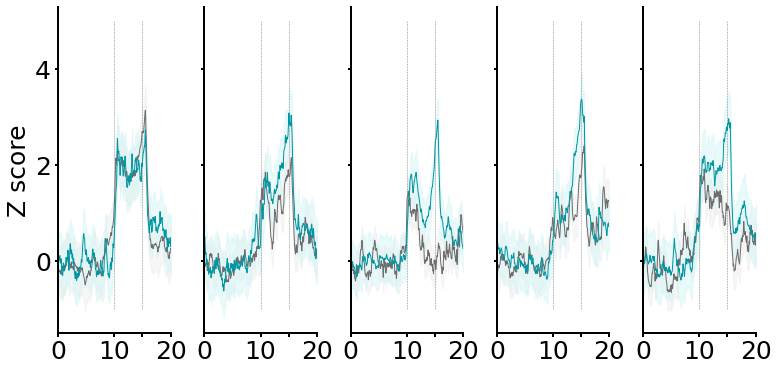

In [384]:
print("Cued trials, 10 seconds before and after sipper extension, trials with licking, aligned to first lick")
f,ax=plt.subplots(figsize=(12.5,6), ncols=5, sharey=True)
f.subplots_adjust(wspace=0.3)

tp.shadedError(ax[0], Day1_Lick_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[0], Day1_Lick_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[1], Day2_Lick_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[1], Day2_Lick_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[2], Day3_Lick_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[2], Day3_Lick_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[3], Day4_Lick_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[3], Day4_Lick_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[4], Day5_Lick_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[4], Day5_Lick_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

ax[0].set_ylabel("Z score", fontsize = 25)
#ax[0].set_xlabel("Time")
ax[0].tick_params(labelsize=25, width=2)
ax[1].tick_params(labelsize=25, width=2)
ax[2].tick_params(labelsize=25, width=2)
ax[3].tick_params(labelsize=25, width=2)
ax[4].tick_params(labelsize=25, width=2)

ax[0].set_xlim([0, 20000])
ax[0].set_xticks([0, 10000, 15000, 20000])
ax[0].set_xticklabels(["0", "10", "", "20"])

ax[1].set_xlim([0, 20000])
ax[1].set_xticks([0, 10000,15000, 20000])
ax[1].set_xticklabels(["0", "10","", "20"])

ax[2].set_xlim([0, 20000])
ax[2].set_xticks([0, 10000,15000, 20000])
ax[2].set_xticklabels(["0", "10","", "20"])

ax[3].set_xlim([0, 20000])
ax[3].set_xticks([0, 10000,15000, 20000])
ax[3].set_xticklabels(["0", "10","", "20"])

ax[4].set_xlim([0, 20000])
ax[4].set_xticks([0, 10000,15000, 20000])
ax[4].set_xticklabels(["0", "10","", "20"])

#ax[0].set_title("session 1")
#ax[1].set_title("session 2")
#ax[2].set_title("session 3")
#ax[3].set_title("session 4")
#ax[4].set_title("session 5")

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['top'].set_visible(False)

ax[0].spines["bottom"].set_linewidth(2)
ax[1].spines["bottom"].set_linewidth(2)
ax[2].spines["bottom"].set_linewidth(2)
ax[3].spines["bottom"].set_linewidth(2)
ax[4].spines["bottom"].set_linewidth(2)

ax[0].spines["left"].set_linewidth(2)
ax[1].spines["left"].set_linewidth(2)
ax[2].spines["left"].set_linewidth(2)
ax[3].spines["left"].set_linewidth(2)
ax[4].spines["left"].set_linewidth(2)

ax[0].vlines(x=[10000, 15000], ymin=-1, ymax=5, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[1].vlines(x=[10000, 15000], ymin=-1, ymax=5, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[2].vlines(x=[10000, 15000], ymin=-1, ymax=5, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[3].vlines(x=[10000, 15000], ymin=-1, ymax=5, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[4].vlines(x=[10000, 15000], ymin=-1, ymax=5, colors='black', ls='--', lw=0.5, alpha=0.5)

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Conferences\\2022 MMiN\\poster\\figures\\photometry_licking.pdf")


In [318]:
Day1_max_NR = []
Day2_max_NR = []
Day3_max_NR = []
Day4_max_NR = []
Day5_max_NR = []

Day1_max_PR = []
Day2_max_PR = []
Day3_max_PR = []
Day4_max_PR = []
Day5_max_PR = []

Day1_AUC_NR = []
Day2_AUC_NR = []
Day3_AUC_NR = []
Day4_AUC_NR = []
Day5_AUC_NR = []

Day1_AUC_PR = []
Day2_AUC_PR = []
Day3_AUC_PR = []
Day4_AUC_PR = []
Day5_AUC_PR = []

for meanSnips in Day1_Lick_Snips_NR:
    Day1_max_NR.append(np.max(meanSnips)) 
    AUCStart = int(len(meanSnips) /2)
    Day1_AUC_NR.append(np.trapz(meanSnips[AUCStart:]))
    
for meanSnips in Day2_Lick_Snips_NR:
    Day2_max_NR.append(np.max(meanSnips)) 
    AUCStart = int(len(meanSnips) /2)
    Day2_AUC_NR.append(np.trapz(meanSnips[AUCStart:]))
    
for meanSnips in Day3_Lick_Snips_NR:
    Day3_max_NR.append(np.max(meanSnips)) 
    AUCStart = int(len(meanSnips) /2)
    Day3_AUC_NR.append(np.trapz(meanSnips[AUCStart:]))    
    
for meanSnips in Day4_Lick_Snips_NR:
    Day4_max_NR.append(np.max(meanSnips)) 
    AUCStart = int(len(meanSnips) /2)
    Day4_AUC_NR.append(np.trapz(meanSnips[AUCStart:]))    
    
for meanSnips in Day5_Lick_Snips_NR:
    Day5_max_NR.append(np.max(meanSnips)) 
    AUCStart = int(len(meanSnips) /2)
    Day5_AUC_NR.append(np.trapz(meanSnips[AUCStart:]))    
    
    
for meanSnips in Day1_Lick_Snips_PR:
    Day1_max_PR.append(np.max(meanSnips)) 
    AUCStart = int(len(meanSnips) /2)
    Day1_AUC_PR.append(np.trapz(meanSnips[AUCStart:]))
    
for meanSnips in Day2_Lick_Snips_PR:
    Day2_max_PR.append(np.max(meanSnips)) 
    AUCStart = int(len(meanSnips) /2)
    Day2_AUC_PR.append(np.trapz(meanSnips[AUCStart:]))
    
for meanSnips in Day3_Lick_Snips_PR:
    Day3_max_PR.append(np.max(meanSnips)) 
    AUCStart = int(len(meanSnips) /2)
    Day3_AUC_PR.append(np.trapz(meanSnips[AUCStart:]))    
    
for meanSnips in Day4_Lick_Snips_PR:
    Day4_max_PR.append(np.max(meanSnips)) 
    AUCStart = int(len(meanSnips) /2)
    Day4_AUC_PR.append(np.trapz(meanSnips[AUCStart:]))    
    
for meanSnips in Day5_Lick_Snips_PR:
    Day5_max_PR.append(np.max(meanSnips)) 
    AUCStart = int(len(meanSnips) /2)
    Day5_AUC_PR.append(np.trapz(meanSnips[AUCStart:]))   
    


C:\Users\kvo019\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


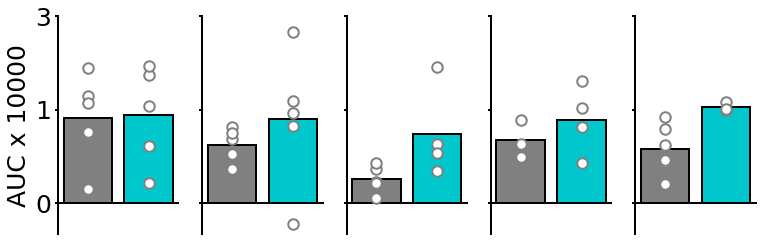

In [319]:
#AUC first 5 days, aligned to first lick

f,ax=plt.subplots(figsize=(12.5,4), ncols=5, sharey=True)
tp.barscatter([Day1_AUC_NR, Day1_AUC_PR], 
              #unequal = True,
              #grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=["grey", "#00C7CC"],
              barfacecoloroption="individual",
              scattersize=110,
              linewidth=2,
              scatteralpha=0.6,
              ax=ax[0])

tp.barscatter([Day2_AUC_NR, Day2_AUC_PR], 
              #unequal = True,
              #grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=["grey", "#00C7CC"],
              barfacecoloroption="individual",
              scattersize=110,
              linewidth=2,
              scatteralpha=0.6,
              ax=ax[1])

tp.barscatter([Day3_AUC_NR, Day3_AUC_PR], 
              unequal = True,
              #grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=["grey", "#00C7CC"],
              barfacecoloroption="individual",
              scattersize=110,
              linewidth=2,
              scatteralpha=0.6,
              ax=ax[2])

tp.barscatter([Day4_AUC_NR, Day4_AUC_PR], 
              unequal = True,
              #grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=["grey", "#00C7CC"],
              barfacecoloroption="individual",
              scattersize=110,
              linewidth=2,
              scatteralpha=0.6,
              ax=ax[3])

tp.barscatter([Day5_AUC_NR, Day5_AUC_PR], 
              #unequal = True,
              #grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=["grey", "#00C7CC"],
              barfacecoloroption="individual",
              scattersize=110,
              linewidth=2,
              scatteralpha=0.6,
              ax=ax[4])

ax[0].set_ylabel("AUC x 10000", fontsize = 25)

ax[0].set_ylim([-5000, 30000])
ax[0].set_yticks([0, 15000, 30000])
ax[0].set_yticklabels(["0", "1", "3"])
ax[0].tick_params(axis='y', labelsize=25)

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Conferences\\2022 MMiN\\poster\\figures\\photometry_lick_trials_AUC.pdf")


C:\Users\kvo019\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


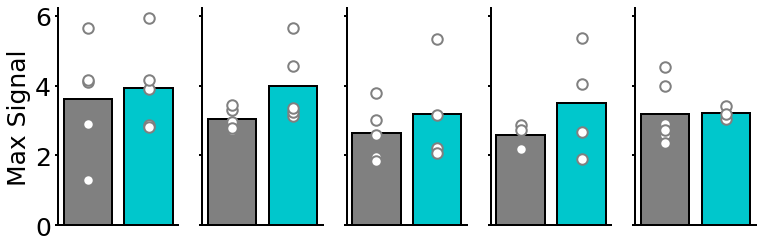

In [320]:
#Max signal first 5 days, aligned to first lick

f,ax=plt.subplots(figsize=(12.5,4), ncols=5, sharey=True)
tp.barscatter([Day1_max_NR, Day1_max_PR], 
              #unequal = True,
              #grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=["grey", "#00C7CC"],
              barfacecoloroption="individual",
              scattersize=110,
              linewidth=2,
              scatteralpha=0.61,
              ax=ax[0])

tp.barscatter([Day2_max_NR, Day2_max_PR], 
              #unequal = True,
              #grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=["grey", "#00C7CC"],
              barfacecoloroption="individual",
              scattersize=110,
              linewidth=2,
              scatteralpha=0.6,
              ax=ax[1])

tp.barscatter([Day3_max_NR, Day3_max_PR], 
              unequal = True,
              #grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=["grey", "#00C7CC"],
              barfacecoloroption="individual",
              scattersize=110,
              linewidth=2,
              scatteralpha=0.6,
              ax=ax[2])

tp.barscatter([Day4_max_NR, Day4_max_PR], 
              unequal = True,
              #grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=["grey", "#00C7CC"],
              barfacecoloroption="individual",
              scattersize=110,
              linewidth=2,
              scatteralpha=0.6,
              ax=ax[3])

tp.barscatter([Day5_max_NR, Day5_max_PR], 
              #unequal = True,
              #grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=["grey", "#00C7CC"],
              barfacecoloroption="individual",
              scattersize=110,
              linewidth=2,
              scatteralpha=0.6,
              ax=ax[4])

ax[0].set_ylabel("Max Signal", fontsize = 25)
ax[0].tick_params(axis='y', labelsize=25)

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Conferences\\2022 MMiN\\poster\\figures\\photometry_lick_trials_Max.pdf")


Cued trials, 10 seconds before and after sipper extension, trials with licking, aligned to first lick, after diet switch


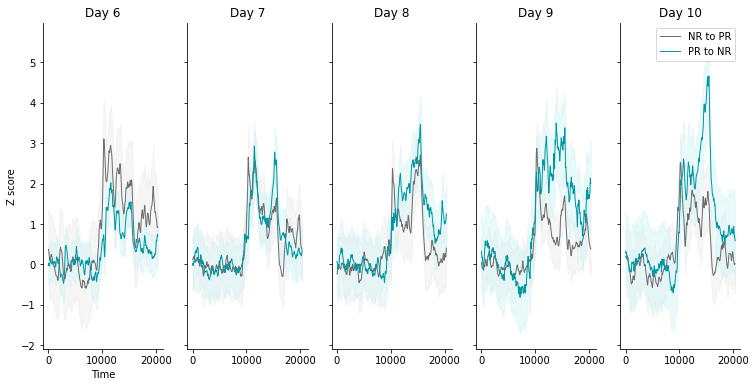

In [321]:
print("Cued trials, 10 seconds before and after sipper extension, trials with licking, aligned to first lick, after diet switch")
f,ax=plt.subplots(figsize=(12.5,6), ncols=5, sharey=True)
tp.shadedError(ax[0], Day6_Lick_Snips_NRtoPR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[0], Day6_Lick_Snips_PRtoNR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[1], Day7_Lick_Snips_NRtoPR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[1], Day7_Lick_Snips_PRtoNR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[2], Day8_Lick_Snips_NRtoPR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[2], Day8_Lick_Snips_PRtoNR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[3], Day9_Lick_Snips_NRtoPR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[3], Day9_Lick_Snips_PRtoNR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[4], Day10_Lick_Snips_NRtoPR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[4], Day10_Lick_Snips_PRtoNR, linecolor="#0097A3", errorcolor="#CCF3F4")

ax[0].set_ylabel("Z score")
ax[0].set_xlabel("Time")

ax[0].set_title("Day 6")
ax[1].set_title("Day 7")
ax[2].set_title("Day 8")
ax[3].set_title("Day 9")
ax[4].set_title("Day 10")

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['top'].set_visible(False)

legend = ["NR to PR", "PR to NR"]
plt.legend(labels=legend)


In [322]:
#trials with licking, aligned to sipper extension

Day1_Lick_Snips_NR_sipper_out = []
Day1_Lick_Snips_PR_sipper_out = []

Day2_Lick_Snips_NR_sipper_out = []
Day2_Lick_Snips_PR_sipper_out = []

Day3_Lick_Snips_NR_sipper_out = []
Day3_Lick_Snips_PR_sipper_out = []

Day4_Lick_Snips_NR_sipper_out = []
Day4_Lick_Snips_PR_sipper_out = []

Day5_Lick_Snips_NR_sipper_out = []
Day5_Lick_Snips_PR_sipper_out = []

Day6_Lick_Snips_NRtoPR_sipper_out = []
Day6_Lick_Snips_PRtoNR_sipper_out = []

Day7_Lick_Snips_NRtoPR_sipper_out = []
Day7_Lick_Snips_PRtoNR_sipper_out = []

Day8_Lick_Snips_NRtoPR_sipper_out = []
Day8_Lick_Snips_PRtoNR_sipper_out = []

Day9_Lick_Snips_NRtoPR_sipper_out = []
Day9_Lick_Snips_PRtoNR_sipper_out = []

Day10_Lick_Snips_NRtoPR_sipper_out = []
Day10_Lick_Snips_PRtoNR_sipper_out = []

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 1:
        Day1_Lick_Snips_NR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 1:
        Day1_Lick_Snips_PR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 2:
        Day2_Lick_Snips_NR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 2:
        Day2_Lick_Snips_PR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])        

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 3:
        Day3_Lick_Snips_NR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 3:
        Day3_Lick_Snips_PR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])      
    
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 4:
        Day4_Lick_Snips_NR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 4:
        Day4_Lick_Snips_PR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])   
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 5:
        Day5_Lick_Snips_NR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 5:
        Day5_Lick_Snips_PR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 6:
        Day6_Lick_Snips_NRtoPR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 6:
        Day6_Lick_Snips_PRtoNR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 7:
        Day7_Lick_Snips_NRtoPR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 7:
        Day7_Lick_Snips_PRtoNR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 8:
        Day8_Lick_Snips_NRtoPR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 8:
        Day8_Lick_Snips_PRtoNR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 9:
        Day9_Lick_Snips_NRtoPR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 9:
        Day9_Lick_Snips_PRtoNR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 10:
        Day10_Lick_Snips_NRtoPR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 10:
        Day10_Lick_Snips_PRtoNR_sipper_out.append(snips_dict_cues[key]["lick_snips_sipper_out"])
        


In [323]:
Day2_Lick_Snips_NR_sipper_out

[array([[1.08497739, 1.07945971, 1.0740641 , ..., 4.06672414, 4.0588548 ,
         4.05081017],
        [0.11681822, 0.11731086, 0.11762765, ..., 0.38866909, 0.38347938,
         0.37831357]]),
 array([[-0.74229539, -0.73704816, -0.73185306, ..., -0.95744852,
         -0.95779462, -0.95804459],
        [ 0.31988508,  0.31717505,  0.3143374 , ...,  1.73851312,
          1.7543366 ,  1.7699728 ],
        [ 1.99950899,  2.0095283 ,  2.01955007, ...,  1.04453085,
          1.04238705,  1.04023052],
        [-0.70365456, -0.69987359, -0.69610052, ...,  0.59104828,
          0.58810633,  0.58519779]]),
 array([[-0.29184401, -0.29770906, -0.30356123, ...,  1.22297903,
          1.22508067,  1.22702555],
        [ 2.74904464,  2.746923  ,  2.74497149, ..., -0.15673226,
         -0.15577157, -0.15465935],
        [-0.62424493, -0.62385214, -0.62366641, ..., -1.55499016,
         -1.56030604, -1.56559528]]),
 array([[-0.87522943, -0.87012248, -0.86507001, ..., -1.13200185,
         -1.13368941, 

Cued trials, 10 seconds before and after sipper extension, trials with licking, aligned to sipper extension


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\fig_utils.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  yarray = np.array(yarray)


ValueError: operands could not be broadcast together with shapes (7,20345) (20,20345) 

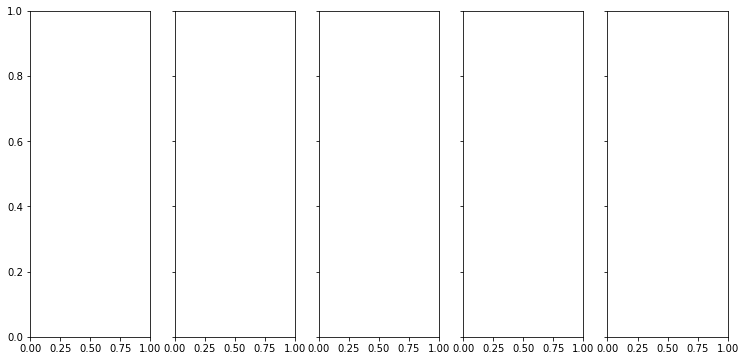

In [324]:
print("Cued trials, 10 seconds before and after sipper extension, trials with licking, aligned to sipper extension")

f,ax=plt.subplots(figsize=(12.5,6), ncols=5, sharey=True)
tp.shadedError(ax[0], Day1_Lick_Snips_NR_sipper_out, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[0], Day1_Lick_Snips_PR_sipper_out, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[1], Day2_Lick_Snips_NR_sipper_out, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[1], Day2_Lick_Snips_PR_sipper_out, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[2], Day3_Lick_Snips_NR_sipper_out, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[2], Day3_Lick_Snips_PR_sipper_out, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[3], Day4_Lick_Snips_NR_sipper_out, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[3], Day4_Lick_Snips_PR_sipper_out, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[4], Day5_Lick_Snips_NR_sipper_out, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[4], Day5_Lick_Snips_PR_sipper_out, linecolor="#0097A3", errorcolor="#CCF3F4")

ax[0].set_ylabel("Z score")
ax[0].set_xlabel("Time")

ax[0].set_title("Day 1")
ax[1].set_title("Day 2")
ax[2].set_title("Day 3")
ax[3].set_title("Day 4")
ax[4].set_title("Day 5")

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['top'].set_visible(False)

legend = ["NR", "PR"]
plt.legend(labels=legend)


In [ ]:
print("Cued trials, 10 seconds before and after sipper extension, trials with licking, aligned to sipper extension, after diet switch")

f,ax=plt.subplots(figsize=(12.5,6), ncols=5, sharey=True)
tp.shadedError(ax[0], Day6_Lick_Snips_NRtoPR_sipper_out, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[0], Day6_Lick_Snips_PRtoNR_sipper_out, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[1], Day7_Lick_Snips_NRtoPR_sipper_out, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[1], Day7_Lick_Snips_PRtoNR_sipper_out, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[2], Day8_Lick_Snips_NRtoPR_sipper_out, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[2], Day8_Lick_Snips_PRtoNR_sipper_out, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[3], Day9_Lick_Snips_NRtoPR_sipper_out, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[3], Day9_Lick_Snips_PRtoNR_sipper_out, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[4], Day10_Lick_Snips_NRtoPR_sipper_out, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[4], Day10_Lick_Snips_PRtoNR_sipper_out, linecolor="#0097A3", errorcolor="#CCF3F4")

ax[0].set_ylabel("Z score")
ax[0].set_xlabel("Time")

ax[0].set_title("Day 6")
ax[1].set_title("Day 7")
ax[2].set_title("Day 8")
ax[3].set_title("Day 9")
ax[4].set_title("Day 10")

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['top'].set_visible(False)

legend = ["NRtoPR", "PRtoNR"]
plt.legend(labels=legend)


In [ ]:
#trials with licking, aligned to sipper extension

Day1_No_Lick_Snips_NR_sipper_out = []
Day1_No_Lick_Snips_PR_sipper_out = []

Day2_No_Lick_Snips_NR_sipper_out = []
Day2_No_Lick_Snips_PR_sipper_out = []

Day3_No_Lick_Snips_NR_sipper_out = []
Day3_No_Lick_Snips_PR_sipper_out = []

Day4_No_Lick_Snips_NR_sipper_out = []
Day4_No_Lick_Snips_PR_sipper_out = []

Day5_No_Lick_Snips_NR_sipper_out = []
Day5_No_Lick_Snips_PR_sipper_out = []

Day6_No_Lick_Snips_NRtoPR_sipper_out = []
Day6_No_Lick_Snips_PRtoNR_sipper_out = []

Day7_No_Lick_Snips_NRtoPR_sipper_out = []
Day7_No_Lick_Snips_PRtoNR_sipper_out = []

Day8_No_Lick_Snips_NRtoPR_sipper_out = []
Day8_No_Lick_Snips_PRtoNR_sipper_out = []

Day9_No_Lick_Snips_NRtoPR_sipper_out = []
Day9_No_Lick_Snips_PRtoNR_sipper_out = []

Day10_No_Lick_Snips_NRtoPR_sipper_out = []
Day10_No_Lick_Snips_PRtoNR_sipper_out = []

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 1:
        Day1_No_Lick_Snips_NR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 1:
        Day1_No_Lick_Snips_PR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 2:
        Day2_No_Lick_Snips_NR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 2:
        Day2_No_Lick_Snips_PR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])        

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 3:
        Day3_No_Lick_Snips_NR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 3:
        Day3_No_Lick_Snips_PR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])      
    
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 4:
        Day4_No_Lick_Snips_NR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 4:
        Day4_No_Lick_Snips_PR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])   
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 5:
        Day5_No_Lick_Snips_NR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 5:
        Day5_No_Lick_Snips_PR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 6:
        Day6_No_Lick_Snips_NRtoPR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 6:
        Day6_No_Lick_Snips_PRtoNR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 7:
        Day7_No_Lick_Snips_NRtoPR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 7:
        Day7_No_Lick_Snips_PRtoNR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 8:
        Day8_No_Lick_Snips_NRtoPR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 8:
        Day8_No_Lick_Snips_PRtoNR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 9:
        Day9_No_Lick_Snips_NRtoPR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 9:
        Day9_No_Lick_Snips_PRtoNR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NRtoPR" and snips_dict_cues[key]["session"] == 10:
        Day10_No_Lick_Snips_NRtoPR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])
    elif snips_dict_cues[key]["diet"] == "PRtoNR" and snips_dict_cues[key]["session"] == 10:
        Day10_No_Lick_Snips_PRtoNR_sipper_out.append(snips_dict_cues[key]["no_lick_snips_sipper_out_mean"])
        


In [ ]:
print("Cued trials, 10 seconds before and after sipper extension, trials without licking, aligned to sipper extension")

f,ax=plt.subplots(figsize=(12.5,6), ncols=5, sharey=True)
tp.shadedError(ax[0], Day1_No_Lick_Snips_NR_sipper_out, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[0], Day1_No_Lick_Snips_PR_sipper_out, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[1], Day2_No_Lick_Snips_NR_sipper_out, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[1], Day2_No_Lick_Snips_PR_sipper_out, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[2], Day3_No_Lick_Snips_NR_sipper_out, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[2], Day3_No_Lick_Snips_PR_sipper_out, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[3], Day4_No_Lick_Snips_NR_sipper_out, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[3], Day4_No_Lick_Snips_PR_sipper_out, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[4], Day5_No_Lick_Snips_NR_sipper_out, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[4], Day5_No_Lick_Snips_PR_sipper_out, linecolor="#0097A3", errorcolor="#CCF3F4")

ax[0].set_ylabel("Z score")
ax[0].set_xlabel("Time")

ax[0].set_title("Day 1")
ax[1].set_title("Day 2")
ax[2].set_title("Day 3")
ax[3].set_title("Day 4")
ax[4].set_title("Day 5")

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['top'].set_visible(False)

legend = ["NR", "PR"]
plt.legend(labels=legend)


In [325]:
#all trials, FEMALES ONLY

Day1_Snips_NR_female = []
Day1_Snips_PR_female = []

Day2_Snips_NR_female = []
Day2_Snips_PR_female = []

Day3_Snips_NR_female = []
Day3_Snips_PR_female = []

Day4_Snips_NR_female = []
Day4_Snips_PR_female = []

Day5_Snips_NR_female = []
Day5_Snips_PR_female = []


for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 1 and snips_dict_cues[key]["sex"] == "female":
        Day1_Snips_NR_female.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 1and snips_dict_cues[key]["sex"] == "female":
        Day1_Snips_PR_female.append(snips_dict_cues[key]["snips_mean"])

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 2 and snips_dict_cues[key]["sex"] == "female":
        Day2_Snips_NR_female.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 2 and snips_dict_cues[key]["sex"] == "female":
        Day2_Snips_PR_female.append(snips_dict_cues[key]["snips_mean"])        

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 3 and snips_dict_cues[key]["sex"] == "female":
        Day3_Snips_NR_female.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 3 and snips_dict_cues[key]["sex"] == "female":
        Day3_Snips_PR_female.append(snips_dict_cues[key]["snips_mean"])      
    
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 4 and snips_dict_cues[key]["sex"] == "female":
        Day4_Snips_NR_female.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 4 and snips_dict_cues[key]["sex"] == "female":
        Day4_Snips_PR_female.append(snips_dict_cues[key]["snips_mean"])   
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 5 and snips_dict_cues[key]["sex"] == "female":
        Day5_Snips_NR_female.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 5 and snips_dict_cues[key]["sex"] == "female":
        Day5_Snips_PR_female.append(snips_dict_cues[key]["snips_mean"])

Cued trials, 10 seconds before and after sipper extension, all trials, females only


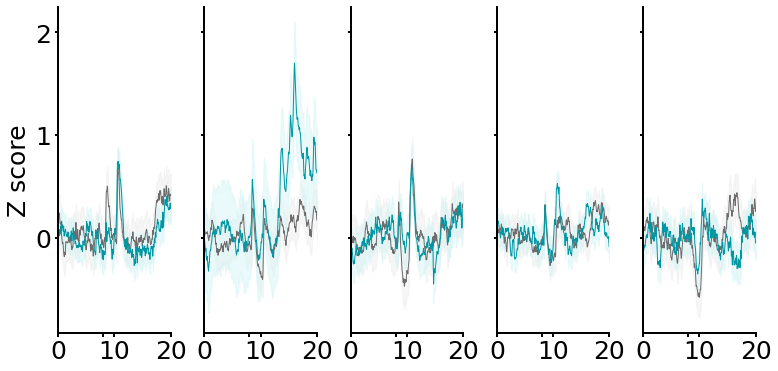

In [326]:
print("Cued trials, 10 seconds before and after sipper extension, all trials, females only")
f,ax=plt.subplots(figsize=(12.5,6), ncols=5, sharey=True)
f.subplots_adjust(wspace=0.3)

tp.shadedError(ax[0], Day1_Snips_NR_female, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[0], Day1_Snips_PR_female, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[1], Day2_Snips_NR_female, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[1], Day2_Snips_PR_female, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[2], Day3_Snips_NR_female, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[2], Day3_Snips_PR_female, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[3], Day4_Snips_NR_female, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[3], Day4_Snips_PR_female, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[4], Day5_Snips_NR_female, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[4], Day5_Snips_PR_female, linecolor="#0097A3", errorcolor="#CCF3F4")

ax[0].set_ylabel("Z score", fontsize = 25)
#ax[0].set_xlabel("Time")
ax[0].tick_params(labelsize=25, width=2)
ax[1].tick_params(labelsize=25, width=2)
ax[2].tick_params(labelsize=25, width=2)
ax[3].tick_params(labelsize=25, width=2)
ax[4].tick_params(labelsize=25, width=2)

ax[0].set_xlim([0, 20000])
ax[0].set_xticks([0, 8000, 10000, 20000])
ax[0].set_xticklabels(["0", "", "10", "20"])

ax[1].set_xlim([0, 20000])
ax[1].set_xticks([0, 8000, 10000, 20000])
ax[1].set_xticklabels(["0","", "10", "20"])

ax[2].set_xlim([0, 20000])
ax[2].set_xticks([0, 8000, 10000, 20000])
ax[2].set_xticklabels(["0","", "10", "20"])

ax[3].set_xlim([0, 20000])
ax[3].set_xticks([0, 8000, 10000, 20000])
ax[3].set_xticklabels(["0","", "10", "20"])

ax[4].set_xlim([0, 20000])
ax[4].set_xticks([0, 8000, 10000, 20000])
ax[4].set_xticklabels(["0","", "10", "20"])

#ax[0].set_title("session 1")
#ax[1].set_title("session 2")
#ax[2].set_title("session 3")
#ax[3].set_title("session 4")
#ax[4].set_title("session 5")

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['top'].set_visible(False)

ax[0].spines["bottom"].set_linewidth(2)
ax[1].spines["bottom"].set_linewidth(2)
ax[2].spines["bottom"].set_linewidth(2)
ax[3].spines["bottom"].set_linewidth(2)
ax[4].spines["bottom"].set_linewidth(2)

ax[0].spines["left"].set_linewidth(2)
ax[1].spines["left"].set_linewidth(2)
ax[2].spines["left"].set_linewidth(2)
ax[3].spines["left"].set_linewidth(2)
ax[4].spines["left"].set_linewidth(2)


#legend = ["NR", "PR"]
#plt.legend(labels=legend)

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Conferences\\2022 MMiN\\poster\\figures\\photometry_all_trials_sipper_aligned_females.pdf")


In [327]:
#trials with licking, aligned to licks, FEMALES ONLY

Day1_Lick_Snips_NR_female = []
Day1_Lick_Snips_PR_female = []

Day2_Lick_Snips_NR_female = []
Day2_Lick_Snips_PR_female = []

Day3_Lick_Snips_NR_female = []
Day3_Lick_Snips_PR_female = []

Day4_Lick_Snips_NR_female = []
Day4_Lick_Snips_PR_female = []

Day5_Lick_Snips_NR_female = []
Day5_Lick_Snips_PR_female = []



for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 1 and snips_dict_cues[key]["sex"] == "female":
        Day1_Lick_Snips_NR_female.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 1 and snips_dict_cues[key]["sex"] == "female":
        Day1_Lick_Snips_PR_female.append(snips_dict_cues[key]["lick_snips_mean"])

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 2 and snips_dict_cues[key]["sex"] == "female":
        Day2_Lick_Snips_NR_female.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 2 and snips_dict_cues[key]["sex"] == "female":
        Day2_Lick_Snips_PR_female.append(snips_dict_cues[key]["lick_snips_mean"])        

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 3 and snips_dict_cues[key]["sex"] == "female":
        Day3_Lick_Snips_NR_female.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 3 and snips_dict_cues[key]["sex"] == "female":
        Day3_Lick_Snips_PR_female.append(snips_dict_cues[key]["lick_snips_mean"])      
    
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 4 and snips_dict_cues[key]["sex"] == "female":
        Day4_Lick_Snips_NR_female.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 4 and snips_dict_cues[key]["sex"] == "female":
        Day4_Lick_Snips_PR_female.append(snips_dict_cues[key]["lick_snips_mean"])   
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 5 and snips_dict_cues[key]["sex"] == "female":
        Day5_Lick_Snips_NR_female.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 5 and snips_dict_cues[key]["sex"] == "female":
        Day5_Lick_Snips_PR_female.append(snips_dict_cues[key]["lick_snips_mean"])
        

Cued trials, aligned to first lick, females only


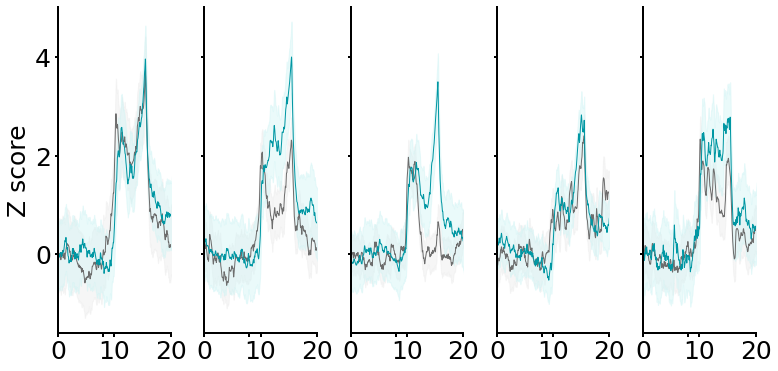

In [328]:
print("Cued trials, aligned to first lick, females only")
f,ax=plt.subplots(figsize=(12.5,6), ncols=5, sharey=True)
f.subplots_adjust(wspace=0.3)

tp.shadedError(ax[0], Day1_Lick_Snips_NR_female, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[0], Day1_Lick_Snips_PR_female, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[1], Day2_Lick_Snips_NR_female, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[1], Day2_Lick_Snips_PR_female, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[2], Day3_Lick_Snips_NR_female, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[2], Day3_Lick_Snips_PR_female, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[3], Day4_Lick_Snips_NR_female, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[3], Day4_Lick_Snips_PR_female, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[4], Day5_Lick_Snips_NR_female, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[4], Day5_Lick_Snips_PR_female, linecolor="#0097A3", errorcolor="#CCF3F4")

ax[0].set_ylabel("Z score", fontsize = 25)
#ax[0].set_xlabel("Time")
ax[0].tick_params(labelsize=25, width=2)
ax[1].tick_params(labelsize=25, width=2)
ax[2].tick_params(labelsize=25, width=2)
ax[3].tick_params(labelsize=25, width=2)
ax[4].tick_params(labelsize=25, width=2)

ax[0].set_xlim([0, 20000])
ax[0].set_xticks([0, 8000, 10000, 20000])
ax[0].set_xticklabels(["0", "", "10", "20"])

ax[1].set_xlim([0, 20000])
ax[1].set_xticks([0, 8000, 10000, 20000])
ax[1].set_xticklabels(["0","", "10", "20"])

ax[2].set_xlim([0, 20000])
ax[2].set_xticks([0, 8000, 10000, 20000])
ax[2].set_xticklabels(["0","", "10", "20"])

ax[3].set_xlim([0, 20000])
ax[3].set_xticks([0, 8000, 10000, 20000])
ax[3].set_xticklabels(["0","", "10", "20"])

ax[4].set_xlim([0, 20000])
ax[4].set_xticks([0, 8000, 10000, 20000])
ax[4].set_xticklabels(["0","", "10", "20"])

#ax[0].set_title("session 1")
#ax[1].set_title("session 2")
#ax[2].set_title("session 3")
#ax[3].set_title("session 4")
#ax[4].set_title("session 5")

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['top'].set_visible(False)

ax[0].spines["bottom"].set_linewidth(2)
ax[1].spines["bottom"].set_linewidth(2)
ax[2].spines["bottom"].set_linewidth(2)
ax[3].spines["bottom"].set_linewidth(2)
ax[4].spines["bottom"].set_linewidth(2)

ax[0].spines["left"].set_linewidth(2)
ax[1].spines["left"].set_linewidth(2)
ax[2].spines["left"].set_linewidth(2)
ax[3].spines["left"].set_linewidth(2)
ax[4].spines["left"].set_linewidth(2)


#legend = ["NR", "PR"]
#plt.legend(labels=legend)

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Conferences\\2022 MMiN\\poster\\figures\\photometry_lick_aligned_females.pdf")
